<a href="https://colab.research.google.com/github/sanjaykmenon/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Sanjay_Krishna_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [37]:
df.columns = ['unique_id', 'age','weight','exercise_time']
df.head()
df.dtypes
#df.reset_index()

unique_id        int64
age              int64
weight           int64
exercise_time    int64
dtype: object

In [33]:
exercise_bins = pd.cut(df['exercise_time'],10)

pd.crosstab(exercise_bins, df['age'], normalize = 'columns')



age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-0.3, 30.0]",0.05,0.130435,0.058824,0.000000,0.052632,0.142857,0.058824,0.105263,0.000000,0.1250,0.000000,0.153846,0.142857,0.052632,0.15,0.038462,0.068966,0.190476,0.200000,0.133333,0.00,0.047619,0.181818,0.09375,0.000,0.153846,0.000000,0.1,0.076923,0.136364,0.1250,0.090909,0.076923,0.130435,0.05,0.083333,0.071429,0.125000,0.000000,0.083333,0.133333,0.136364,0.000000,0.227273,0.266667,0.157895,0.043478,0.333333,0.1875,0.142857,0.15,0.071429,0.105263,0.296296,0.111111,0.210526,0.45,0.055556,0.1875,0.307692,0.142857,0.266667,0.421053
"(30.0, 60.0]",0.05,0.086957,0.058824,0.111111,0.157895,0.047619,0.117647,0.105263,0.066667,0.1875,0.208333,0.153846,0.190476,0.105263,0.15,0.076923,0.206897,0.095238,0.066667,0.066667,0.20,0.047619,0.000000,0.15625,0.000,0.076923,0.095238,0.0,0.076923,0.136364,0.1250,0.090909,0.076923,0.043478,0.10,0.166667,0.071429,0.083333,0.000000,0.041667,0.066667,0.045455,0.076923,0.000000,0.066667,0.105263,0.086957,0.066667,0.1250,0.142857,0.10,0.107143,0.105263,0.148148,0.111111,0.210526,0.05,0.000000,0.2500,0.076923,0.071429,0.333333,0.315789
"(60.0, 90.0]",0.15,0.173913,0.176471,0.000000,0.157895,0.095238,0.117647,0.000000,0.066667,0.0000,0.083333,0.000000,0.190476,0.000000,0.10,0.038462,0.034483,0.095238,0.066667,0.066667,0.16,0.142857,0.090909,0.15625,0.000,0.230769,0.190476,0.0,0.076923,0.181818,0.0625,0.045455,0.076923,0.086957,0.15,0.083333,0.000000,0.083333,0.117647,0.125000,0.400000,0.045455,0.230769,0.227273,0.133333,0.105263,0.130435,0.200000,0.3125,0.142857,0.15,0.142857,0.210526,0.148148,0.111111,0.315789,0.30,0.222222,0.3125,0.153846,0.500000,0.333333,0.263158
"(90.0, 120.0]",0.15,0.173913,0.058824,0.111111,0.105263,0.095238,0.058824,0.105263,0.133333,0.0000,0.041667,0.038462,0.047619,0.052632,0.10,0.153846,0.068966,0.142857,0.266667,0.066667,0.24,0.142857,0.136364,0.12500,0.000,0.000000,0.190476,0.0,0.000000,0.181818,0.0625,0.045455,0.076923,0.086957,0.10,0.000000,0.071429,0.125000,0.176471,0.125000,0.000000,0.090909,0.230769,0.136364,0.000000,0.157895,0.260870,0.133333,0.1250,0.285714,0.30,0.035714,0.263158,0.148148,0.388889,0.105263,0.05,0.333333,0.1875,0.384615,0.285714,0.066667,0.000000
"(120.0, 150.0]",0.10,0.043478,0.000000,0.111111,0.210526,0.190476,0.117647,0.052632,0.133333,0.0625,0.041667,0.076923,0.047619,0.157895,0.10,0.115385,0.034483,0.095238,0.000000,0.000000,0.04,0.000000,0.000000,0.12500,0.000,0.076923,0.000000,0.3,0.076923,0.090909,0.0625,0.000000,0.076923,0.130435,0.20,0.083333,0.142857,0.041667,0.058824,0.083333,0.000000,0.136364,0.076923,0.045455,0.133333,0.105263,0.086957,0.066667,0.0625,0.047619,0.00,0.285714,0.052632,0.148148,0.111111,0.105263,0.15,0.388889,0.0625,0.076923,0.000000,0.000000,0.000000
"(150.0, 180.0]",0.10,0.086957,0.176471,0.222222,0.105263,0.142857,0.176471,0.052632,0.000000,0.1875,0.125000,0.076923,0.142857,0.157895,0.10,0.038462,0.068966,0.142857,0.000000,0.266667,0.16,0.142857,0.000000,0.06250,0.250,0.076923,0.142857,0.0,0.153846,0.045455,0.0625,0.090909,0.153846,0.043478,0.10,0.083333,0.071429,0.083333,0.176471,0.083333,0.200000,0.090909,0.076923,0.136364,0.066667,0.105263,0.000000,0.000000,0.1250,0.190476,0.15,0.214286,0.210526,0.074074,0.166667,0.052632,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
"(180.0, 210.0]",0.10,0.086957,0.176471,0.055556,0.157895,0.047619,0.117647,0.157895,0.133333,0.0625,0.125000,0.153846,0.000000,0.000000,0.15,0.115385,0.241379,0.047619,0.133333,0.066667,0.04,0.095238,0.090909,0.00000,0.000,0.076923,0.095238,0.1,0.076923,0.000000,0.1250,0.136364,0.076923,0.130435,0.05,0.083333,0.000000,0.041667,0.176471,0.166667,0.000000,0.045455,0.076923,0.136364,0.133333,0.157895,0.086957,0.066667,0.0000,0.000000,0.10,0.142857,0.052632,0.037037,0.000000,0.

In [34]:
pd.crosstab(exercise_bins, df['weight'], normalize='columns')

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-0.3, 30.0]",0.200000,0.0,0.076923,0.125,0.111111,0.3,0.000,0.000000,0.000000,0.076923,0.071429,0.1,0.000,0.10,0.000000,0.000,0.066667,0.071429,0.000000,0.090909,0.153846,0.000000,0.000000,0.111111,0.058824,0.000000,0.058824,0.200000,0.000000,0.071429,0.000,0.142857,0.000000,0.222222,0.000000,0.076923,0.066667,0.000000,0.000000,0.000000,...,0.222222,0.166667,0.6,0.25,0.5,0.222222,0.000000,0.250,0.5,0.142857,0.25,0.222222,0.0,0.333333,0.666667,0.500000,0.333333,0.0,0.0,0.000000,0.0,1.0,0.0,0.666667,0.0,1.0,0.4,0.666667,0.666667,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
"(30.0, 60.0]",0.133333,0.0,0.000000,0.000,0.111111,0.0,0.125,0.000000,0.052632,0.076923,0.071429,0.1,0.250,0.10,0.090909,0.000,0.133333,0.142857,0.166667,0.090909,0.000000,0.000000,0.076923,0.000000,0.117647,0.055556,0.058824,0.133333,0.058824,0.000000,0.250,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.052632,0.000000,0.230769,...,0.222222,0.250000,0.0,0.50,0.0,0.222222,0.666667,0.250,0.0,0.285714,0.25,0.222222,0.5,0.333333,0.000000,0.333333,0.333333,0.0,0.0,0.666667,0.0,0.0,0.5,0.333333,1.0,0.0,0.6,0.000000,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(60.0, 90.0]",0.066667,0.1,0.153846,0.125,0.111111,0.0,0.000,0.090909,0.105263,0.076923,0.142857,0.0,0.125,0.10,0.090909,0.000,0.200000,0.000000,0.166667,0.000000,0.000000,0.111111,0.307692,0.222222,0.000000,0.000000,0.058824,0.000000,0.058824,0.142857,0.000,0.142857,0.111111,0.111111,0.181818,0.307692,0.066667,0.052632,0.153846,0.153846,...,0.111111,0.166667,0.2,0.00,0.0,0.222222,0.166667,0.125,0.0,0.285714,0.25,0.444444,0.0,0.111111,0.000000,0.166667,0.333333,1.0,1.0,0.333333,1.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(90.0, 120.0]",0.000000,0.0,0.000000,0.125,0.111111,0.0,0.250,0.090909,0.000000,0.230769,0.142857,0.0,0.000,0.05,0.090909,0.000,0.066667,0.142857,0.000000,0.181818,0.000000,0.333333,0.076923,0.111111,0.235294,0.111111,0.117647,0.000000,0.117647,0.142857,0.125,0.071429,0.111111,0.000000,0.000000,0.000000,0.200000,0.105263,0.000000,0.076923,...,0.333333,0.416667,0.2,0.25,0.5,0.333333,0.166667,0.250,0.5,0.285714,0.25,0.111111,0.5,0.222222,0.333333,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(120.0, 150.0]",0.000000,0.1,0.153846,0.000,0.111111,0.0,0.000,0.181818,0.157895,0.076923,0.285714,0.2,0.250,0.10,0.090909,0.250,0.000000,0.000000,0.166667,0.181818,0.153846,0.000000,0.000000,0.000000,0.176471,0.055556,0.058824,0.000000,0.000000,0.071429,0.000,0.000000,0.111111,0.111111,0.090909,0.076923,0.000000,0.105263,0.000000,0.076923,...,0.111111,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.125,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(150.0, 180.0]",0.066667,0.1,0.076923,0.250,0.000000,0.2,0.250,0.181818,0.157895,0.153846,0.071429,0.1,0.000,0.00,0.181818,0.000,0.133333,0.000000,0.000000,0.000000,0.076923,0.111111,0.000000,0.111111,0.176471,0.222222,0.176471,0.066667,0.058824,0.000000,0.000,0.142857,0.000000,0.000000,0.090909,0.153846,0.133333,0.157895,0.384615,0.230769,...,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(180.0, 210.0]",0.133333,0.3,0.000000,0.000,0.000000,0.1,0.125,0.181818,0.105263,0.153846,0.14

In [27]:
weight_bins = pd.cut(df['weight'], 5)

pd.crosstab(weight_bins, df['age'], normalize='columns')

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(99.854, 129.2]",0.35,0.173913,0.352941,0.277778,0.210526,0.428571,0.352941,0.368421,0.200000,0.3750,0.375000,0.346154,0.238095,0.368421,0.35,0.384615,0.482759,0.380952,0.333333,0.600000,0.44,0.428571,0.363636,0.37500,0.50,0.384615,0.285714,0.5,0.461538,0.136364,0.3750,0.181818,0.461538,0.391304,0.35,0.50,0.500000,0.333333,0.176471,0.333333,0.333333,0.363636,0.076923,0.318182,0.266667,0.157895,0.173913,0.266667,0.1250,0.190476,0.20,0.250000,0.421053,0.296296,0.111111,0.263158,0.25,0.277778,0.2500,0.230769,0.142857,0.333333,0.105263
"(129.2, 158.4]",0.40,0.304348,0.235294,0.277778,0.473684,0.238095,0.235294,0.368421,0.600000,0.1875,0.416667,0.307692,0.333333,0.315789,0.10,0.269231,0.310345,0.142857,0.133333,0.133333,0.32,0.190476,0.318182,0.31250,0.25,0.384615,0.333333,0.2,0.230769,0.227273,0.1875,0.500000,0.230769,0.173913,0.20,0.25,0.214286,0.375000,0.352941,0.250000,0.200000,0.363636,0.384615,0.318182,0.400000,0.315789,0.391304,0.266667,0.1875,0.380952,0.20,0.321429,0.263158,0.185185,0.277778,0.000000,0.15,0.388889,0.1875,0.230769,0.285714,0.200000,0.157895
"(158.4, 187.6]",0.15,0.260870,0.294118,0.333333,0.157895,0.095238,0.235294,0.105263,0.133333,0.2500,0.000000,0.230769,0.285714,0.210526,0.40,0.230769,0.137931,0.142857,0.266667,0.066667,0.12,0.238095,0.181818,0.15625,0.25,0.153846,0.285714,0.2,0.230769,0.227273,0.2500,0.227273,0.307692,0.173913,0.35,0.25,0.071429,0.125000,0.294118,0.125000,0.333333,0.136364,0.307692,0.227273,0.000000,0.157895,0.260870,0.266667,0.1875,0.190476,0.15,0.285714,0.263158,0.296296,0.166667,0.526316,0.40,0.166667,0.3125,0.153846,0.214286,0.200000,0.263158
"(187.6, 216.8]",0.10,0.217391,0.117647,0.111111,0.105263,0.238095,0.058824,0.052632,0.066667,0.1875,0.166667,0.115385,0.142857,0.000000,0.10,0.115385,0.068966,0.238095,0.266667,0.200000,0.12,0.095238,0.136364,0.12500,0.00,0.000000,0.095238,0.1,0.000000,0.272727,0.1250,0.090909,0.000000,0.260870,0.05,0.00,0.142857,0.166667,0.176471,0.291667,0.133333,0.136364,0.230769,0.090909,0.200000,0.263158,0.173913,0.200000,0.3750,0.142857,0.40,0.142857,0.000000,0.074074,0.333333,0.105263,0.10,0.166667,0.1875,0.307692,0.285714,0.133333,0.210526
"(216.8, 246.0]",0.00,0.043478,0.000000,0.000000,0.052632,0.000000,0.117647,0.105263,0.000000,0.0000,0.041667,0.000000,0.000000,0.105263,0.05,0.000000,0.000000,0.095238,0.000000,0.000000,0.00,0.047619,0.000000,0.03125,0.00,0.076923,0.000000,0.0,0.076923,0.136364,0.0625,0.000000,0.000000,0.000000,0.05,0.00,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.133333,0.105263,0.000000,0.000000,0.1250,0.095238,0.05,0.000000,0.052632,0.148148,0.111111,0.105263,0.10,0.000000,0.0625,0.076923,0.071429,0.133333,0.263158


## Can't seem to find a relationship because there is too much data to analyze here. I think I will try plotting this to see if i can get a better understanding.

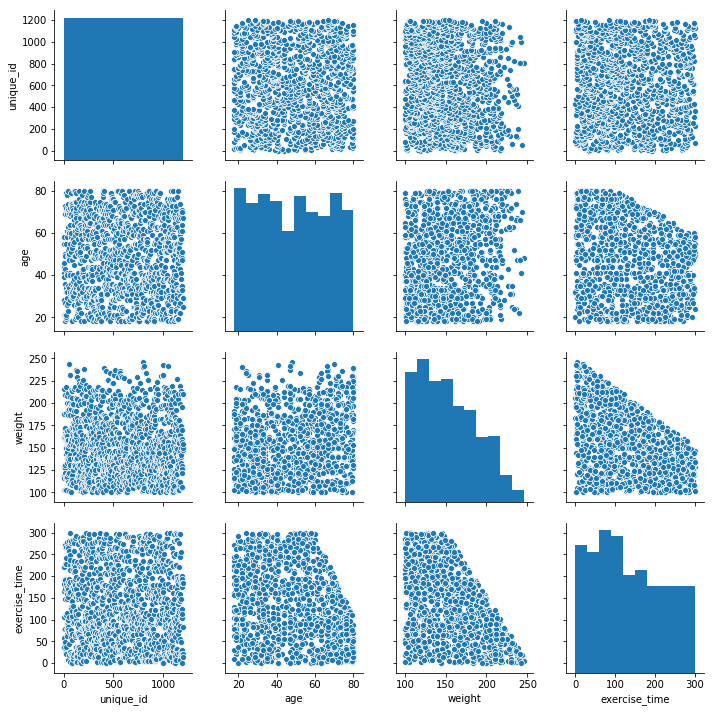

In [35]:
import seaborn as sns

sns.pairplot(df)

## Using seaborn pairplot to plot relationships between each variable to each other, it seems there is a relationship between weights & exercise time where the lower your weigh the more exercie time you have.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. All are continuous data

2. There is a relationship between weight and exercise time, where it seems people who exercise for more time have a lower weight. Similarly there is relationship between age and exercise time where people who are in the group of 60-80 exercise less.

3. The relationship between exercise time and weight can be spurious because usually people who exercise more weigh less and as a result this a causal factor. The other factors seem more realistic such as the age and exercise time, since older people tend to not have the physical capacity to exercise longer generally.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)